# Process Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from yellowbrick.target import FeatureCorrelation

In [4]:
df = pd.read_csv("spotify_data.csv")

In [5]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [6]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [10]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df[df['track_id'].duplicated()]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.07160,0.710,217813,0.710,0.000001,C,0.2060,-2.474,Major,0.0579,169.944,4/4,0.700
1385,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.97500,0.377,334570,0.255,0.000208,E,0.1020,-11.165,Minor,0.0387,125.004,5/4,0.370
1452,Alternative,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,56,0.77900,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.130
1554,Alternative,Steve Lacy,Some,4riDfclV7kPDT9D58FpmHd,58,0.00548,0.784,118393,0.554,0.254000,G,0.0995,-6.417,Major,0.0300,104.010,4/4,0.634
1634,Alternative,tobi lou,Buff Baby,1F1QmI8TMHir9SUFrooq5F,59,0.19000,0.736,215385,0.643,0.000000,F,0.1060,-8.636,Major,0.0461,156.002,4/4,0.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232715,Soul,Emily King,Down,5cA0vB8c9FMOVDWyJHgf26,42,0.55000,0.394,281853,0.346,0.000002,E,0.1290,-13.617,Major,0.0635,90.831,4/4,0.436
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.01360,0.294,258267,0.739,0.004820,C,0.1380,-7.167,Major,0.0434,176.402,4/4,0.945
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813



We have **55,951** duplicated rows that we need to address. Before we can address these duplications though we need to see what the cause of the duplicates are.

In [13]:
#checking rows for duplicated ids to see differences
df[df['track_id']=='6iOvnACn4ChlAw4lWUU4dd'] 

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
77710,Children's Music,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
93651,Indie,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
113770,Pop,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


In [14]:
df[df['track_id']=='2HFczeynfKGiM9KF2z2K7K']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
48555,Blues,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,35,0.0136,0.294,258267,0.739,0.00482,C,0.138,-7.167,Major,0.0434,176.402,4/4,0.945
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.0136,0.294,258267,0.739,0.00482,C,0.138,-7.167,Major,0.0434,176.402,4/4,0.945


We see that most of the attributes of the duplicated songs are the same except for **popularity** and **genre**. The 'popularity' column can be aggregated since it is a numerical column but the categorical column of 'genre' is a little bit trickier. What makes the most sense in this case would be to create different columns with the genre names and display with binary values whether a song belongs to that genre or not.

In [15]:
# Generating a list with the genre names
genre_list = list(df['genre'].unique())

# Creating the genre columns using the genre list
for genre in genre_list:
    df[genre] = (df['genre'] == genre).astype('int')

df_copy = df.copy()

# Grouping by track_id number to get rid of duplicates and keeping the maximum values in each column
df_copy = df_copy.groupby(['track_id']).max()
df = df_copy

In [16]:
#verifying that duplicates have been eliminated
df[df.index =='6iOvnACn4ChlAw4lWUU4dd']

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
track_id,,,,,,,,,,,,,,,,,,,,,
6iOvnACn4ChlAw4lWUU4dd,R&B,Doja Cat,Go To Town,64,0.0716,0.71,217813,0.71,0.000001,C,...,1,0,0,0,0,0,0,0,0,0


We successfully addressed the duplicates of each track by aggregating them to a single row.

# EDA

## Popularity score

Text(0.5, 1.0, 'Popularity Distribution')

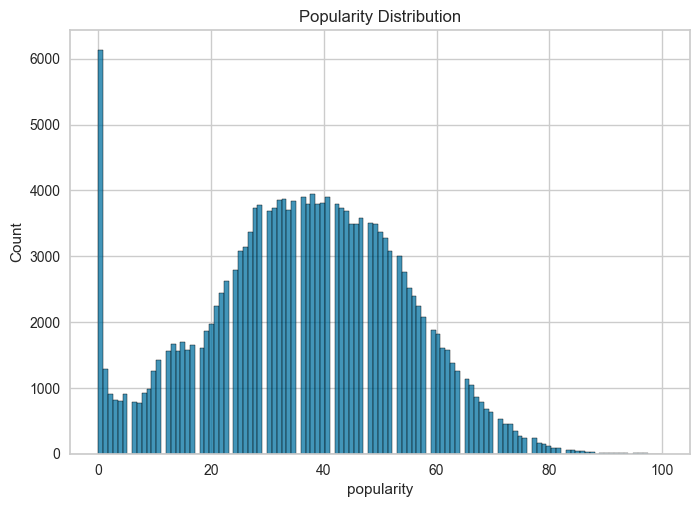

In [17]:
#creating a histogram to see distribution of popularity scores in the dataset.
sns.histplot(df['popularity'], bins='auto').set_title('Popularity Distribution')

The histogram reveals a bimodal distribution, indicating two distinct peaks in the data. One peak is
at 0, suggesting a high frequency of occurrences near this value. The other peak appears to be around 40,
indicating another concentration of data points at this range. The peak at 0 reflects the substantial number
of songs that have either been uploaded to this platform but remain unplayed or originate from periods
predating the platform’s inception.


## Genre

In [18]:
genre_counts = df['genre'].value_counts()

C:\Users\ngduy\AppData\Local\Temp\ipykernel_22408\2230659385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, ax=ax, palette='viridis')


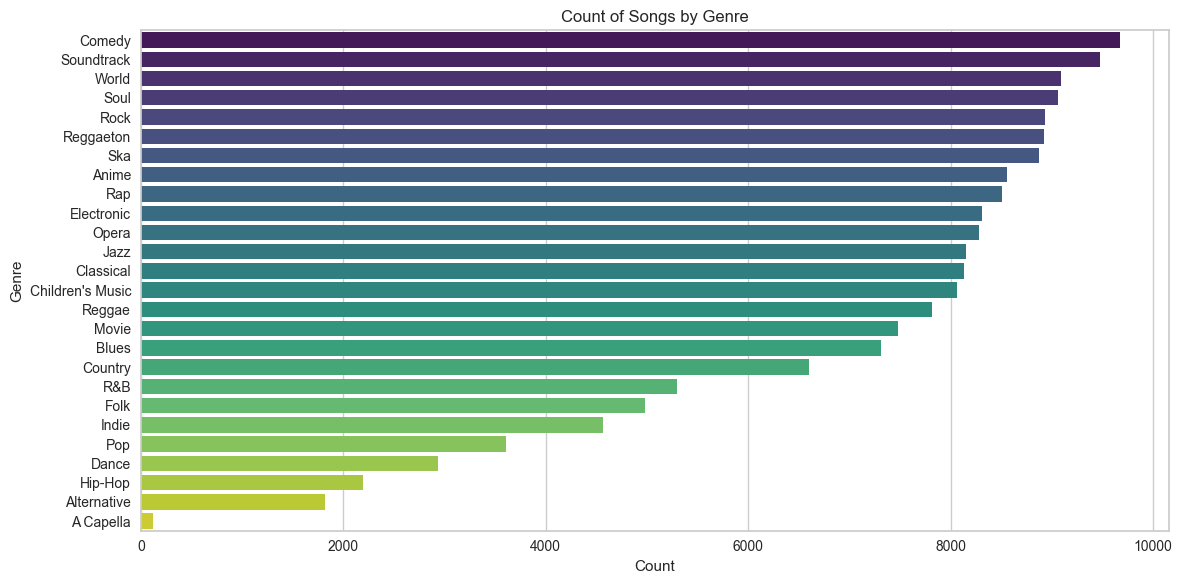

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=genre_counts.values, y=genre_counts.index, ax=ax, palette='viridis')
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
ax.set_title('Count of Songs by Genre')

plt.tight_layout() 

Comedy and Soundtrack music genres have the highest number of songs. Comedy music often includes a vast array of parodies, humorous songs, and skits that are frequently updated to stay relevant, contributing to its large volume. Soundtracks, encompassing scores for movies, television shows, and video games, also amass a significant number of songs due to the diverse and expansive nature of these media productions. On the other hand, A Capella music has the least number of songs, as it requires specialized vocal skills and often involves intricate arrangements that are more challenging to produce. Consequently, the volume of A Capella music is smaller compared to genres that have broader, more accessible production methods.


## Duration

Text(0, 0.5, 'Genres')

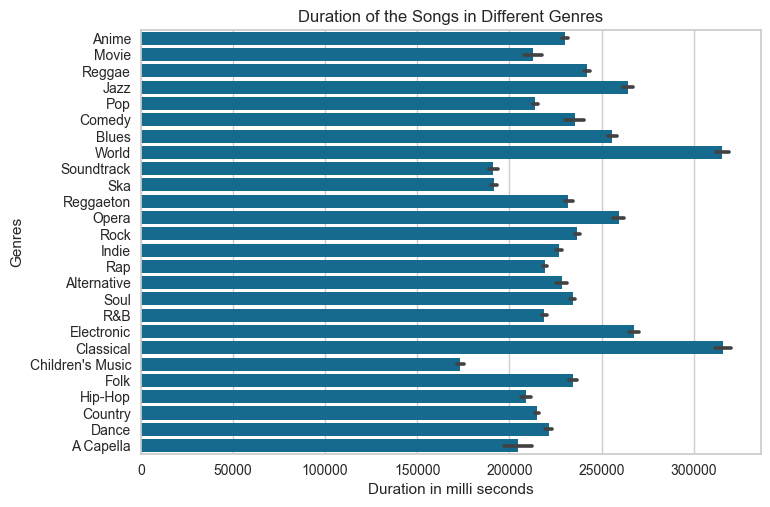

In [20]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket", as_cmap= True)
sns.barplot (y='genre', x='duration_ms', data=df)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")

World and Classical music genres are known for their extended durations, often featuring compositions
with intricate structures, multiple movements, and complex arrangements that require more time to develop.
Symphonies, operas, and traditional World music pieces can span an hour or more, showcasing their elaborate
progressions and instrumental solos. In contrast, Children’s music, despite having a large number of songs,
typically has the shortest durations. This is because Children’s music is designed for young audiences
with shorter attention spans, featuring catchy, repetitive melodies and simple lyrics that can be quickly
communicated. As a result, these songs are usually around two to three minutes long, making them more
engaging for young listeners.
15


## Time signature

Text(0.5, 1.0, 'Popularity Based on Time Signature')

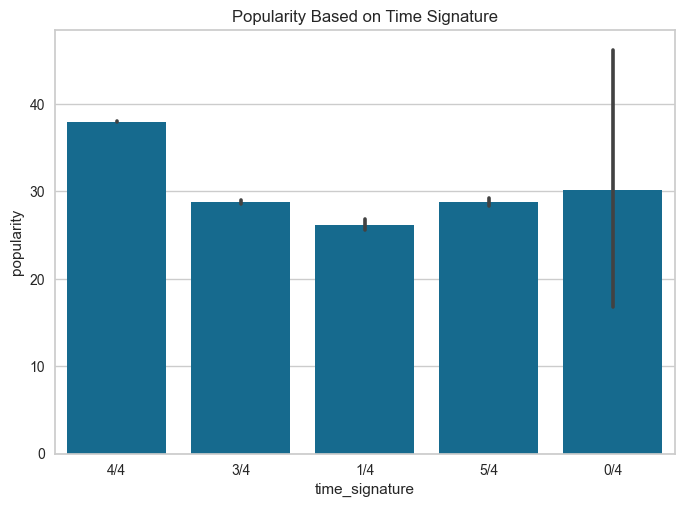

In [21]:
sns.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularity Based on Time Signature')

The graph shows that there is a significant difference in popularity between the different time signatures. Songs in 4/4 time signature are the most popular, followed by songs in 3/4 time signature. Songs in 1/4, 5/4, and 0/4 time signatures are less popular.

## Top Artists in song number

C:\Users\ngduy\AppData\Local\Temp\ipykernel_22408\1863348743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='Paired')


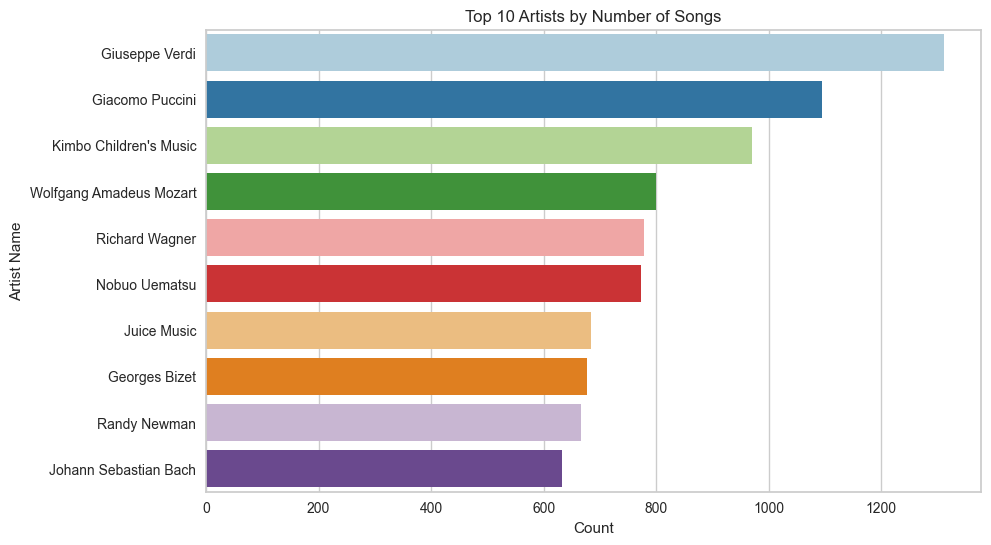

In [23]:
# Plotting using Seaborn
artist_counts = df['artist_name'].value_counts()
top_artists = artist_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='Paired')
plt.xlabel('Count')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists by Number of Songs')
plt.show()

##  Feature Correlation 

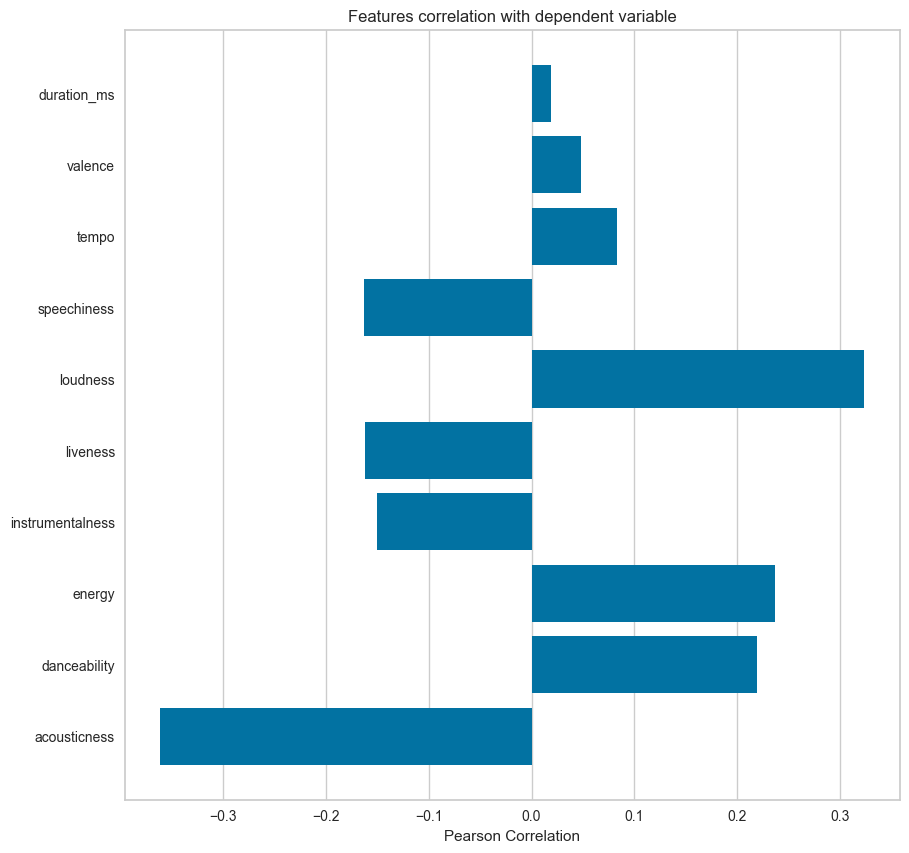

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [26]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(10,10)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

Loudness, energy, and danceability are likely to exhibit a positive correlation with popularity. This trend can be attributed to the fact that songs with higher loudness levels tend to capture listeners' attention more effectively, creating an engaging auditory experience. Similarly, high-energy tracks often evoke strong emotional responses and excitement, making them more appealing and memorable to audiences. Danceability, which measures how suitable a track is for dancing, also contributes to a song's popularity, as it enhances the overall enjoyment and physical engagement for listeners, particularly in social and party settings. Consequently, tracks that score high in these attributes are more likely to achieve widespread popularity and frequent plays.

## Top popular artists

In [27]:
df.groupby("artist_name").popularity.max().sort_values(ascending=False).head(10)

artist_name
Ariana Grande    100
Post Malone       99
Daddy Yankee      98
Marshmello        97
Sam Smith         97
Pedro Capó        97
Halsey            97
Ava Max           97
Anuel Aa          96
J. Cole           96
Name: popularity, dtype: int64

In [28]:
pop5 = df.loc[df.artist_name.isin(["Ariana Grande","Post Malone","Daddy Yankee","Sam Smith","Halsey"])]
pop5.groupby("genre").artist_name.unique()

genre
Dance                   [Ariana Grande, Halsey]
Indie                                  [Halsey]
Pop          [Ariana Grande, Halsey, Sam Smith]
Rap                               [Post Malone]
Reggaeton                        [Daddy Yankee]
Name: artist_name, dtype: object

Among the most popular genres among top artists, Dance, Indie, and Pop stand out prominently. Dance music, with its rhythmic beats and energetic vibe, dominates the charts, captivating audiences who enjoy the pulsating rhythms ideal for parties and clubs. Indie music, known for its eclectic and innovative sounds, appeals to listeners seeking unique and unconventional tunes, often gaining popularity through grassroots and viral success. Pop music, characterized by its catchy melodies and broad appeal, consistently remains a favorite due to its accessibility and widespread commercial success. Together, these genres reflect the diverse musical tastes of contemporary audiences and the versatility of top artists who often excel across these popular categories.

<function matplotlib.pyplot.show(close=None, block=None)>

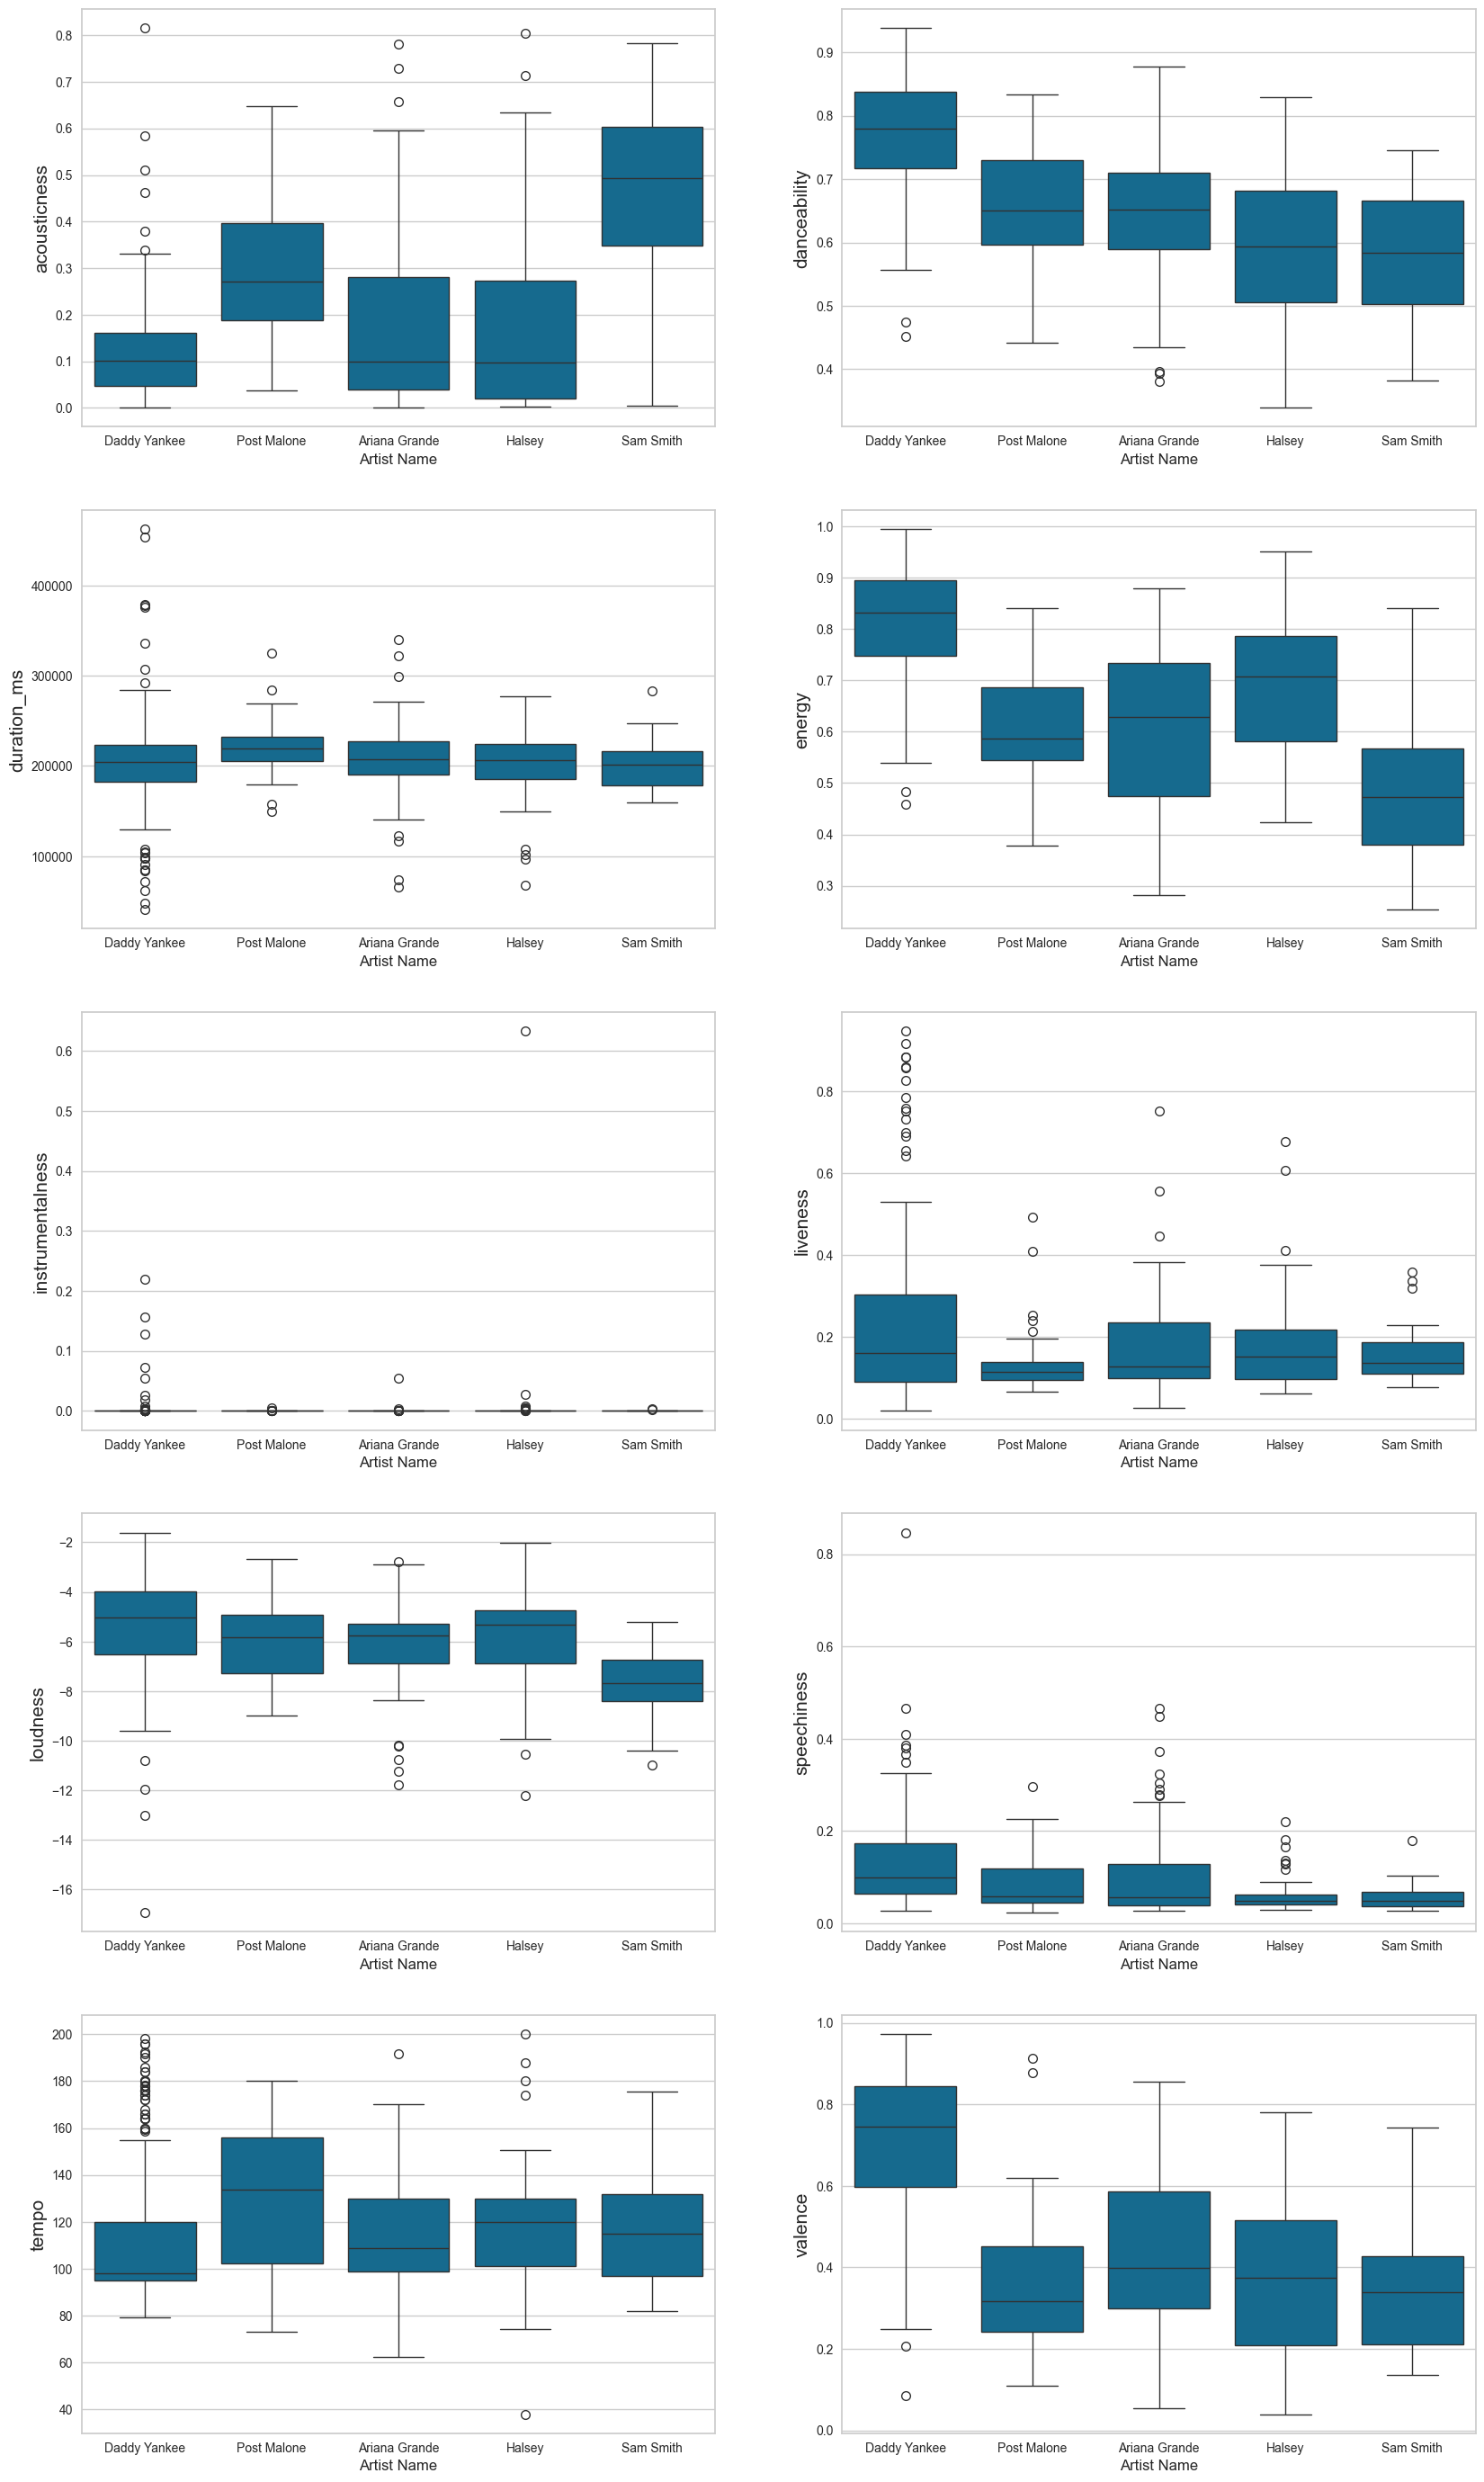

In [30]:
plt.figure(figsize = (20, 35))
pltnum = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness", "speechiness", "tempo", "valence"]:
    if pltnum<=10:
        ax = plt.subplot(5,2,pltnum)
        sns.boxplot(x = pop5["artist_name"], y= pop5[col])
        plt.xlabel("Artist Name", fontsize=12)
        plt.ylabel(col,fontsize=15)
    pltnum +=1
plt.show

**loudness**, **danceability** and **energy** are the most used feature choices of the most popular artists.